In [17]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings. filterwarnings('ignore')


In [5]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [6]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


<Axes: >

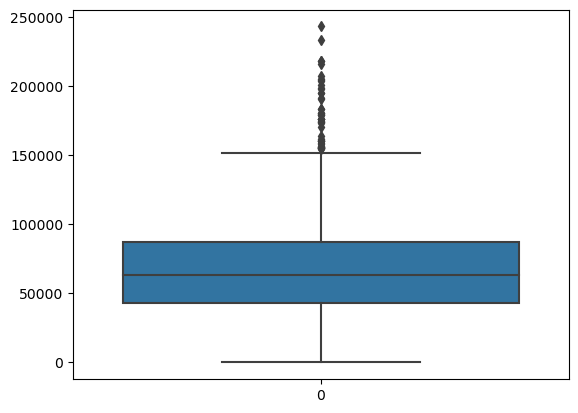

In [8]:
sns.boxplot(df['KM'])

<Axes: >

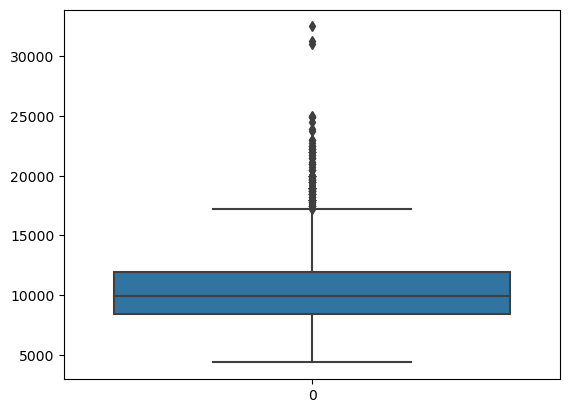

In [9]:
sns.boxplot(df['Price'])

<Axes: >

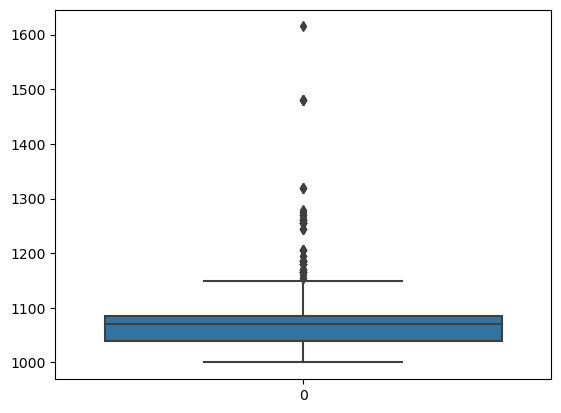

In [10]:
sns.boxplot(df['Weight'])

<Axes: xlabel='KM', ylabel='Count'>

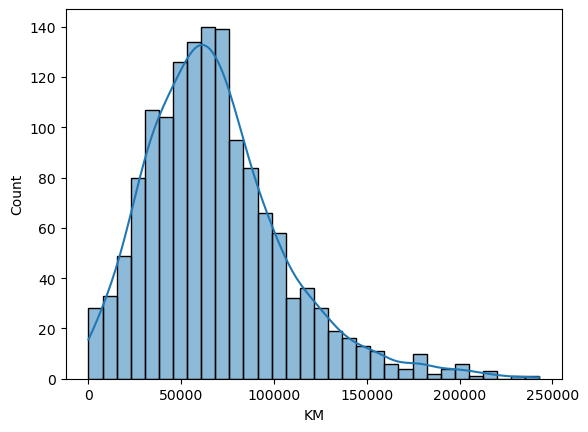

In [11]:
sns.histplot(df['KM'],kde=True)

<Axes: xlabel='Price', ylabel='Count'>

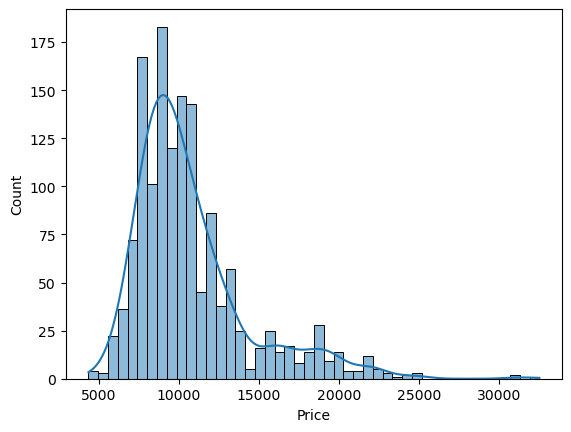

In [12]:
sns.histplot(df['Price'],kde=True)

In [13]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [18]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [19]:
df1=df.drop(columns=['Cylinders'])

In [20]:
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [22]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'],
      dtype='object')

In [25]:
model=smf.ols('KM~Price+Age_08_04+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     177.4
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          6.20e-242
Time:                        11:16:07   Log-Likelihood:                -16581.
No. Observations:                1436   AIC:                         3.318e+04
Df Residuals:                    1425   BIC:                         3.324e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9146.5250   2.91e+04      0.314      0.754    -4.8e+04    6.63e+04
Fuel_Type[T.Diesel]  7053.6064   7189.679      0.981      0.327   -7049.885    2.12e+04
Fuel_Type[T.Petrol]  -4.57e+04   6268.823     -7.290      0.000    -5.8e+04   -3.34e+04
Price                  -6.1791      0.470    -13.154      0.000      -7.101      -5.258
Age_08_04             161.7751     78.829      2.052      0.040       7.142     316.408
HP                    162.6196     68.004      2.391      0.017      29.221     296.018
Automatic           -4118.3935   3025.499     -1.361      0.174   -1.01e+04    1816.516
cc                      0.9589      1.729      0.555      0.579      -2.432       4.350
Doors                2175.1601    766.166      2.839      0.005     672.226    3678.094
Gears                1.434e+04   3712.065      3.863      0.000    7056.654    2.16e+04
Weight                 53.5898     25.069      2.138      0.033       4.414     102.766
==============================================================================
Omnibus:                       86.254   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.375
Skew:                           0.411   Prob(JB):                     2.74e-37
Kurtosis:                       4.462   Cond. No.                     5.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model.pvalues

Intercept              7.536172e-01
Fuel_Type[T.Diesel]    3.267228e-01
Fuel_Type[T.Petrol]    5.126225e-13
Price                  2.205339e-37
Age_08_04              4.032951e-02
HP                     1.691691e-02
Automatic              1.736569e-01
cc                     5.792018e-01
Doors                  4.589451e-03
Gears                  1.172019e-04
Weight                 3.271168e-02
dtype: float64

In [31]:
model.tvalues

Intercept               0.313934
Fuel_Type[T.Diesel]     0.981074
Fuel_Type[T.Petrol]    -7.289797
Price                 -13.154198
Age_08_04               2.052232
HP                      2.391322
Automatic              -1.361228
cc                      0.554678
Doors                   2.839020
Gears                   3.862635
Weight                  2.137690
dtype: float64

In [33]:
df1['predicted']=model.fittedvalues

In [35]:
df1['predicted']

0       93705.935001
1       92161.160061
2       91087.115164
3       85231.565515
4       93561.534238
            ...     
1431    76645.875876
1432    55926.214774
1433    70254.428661
1434    77816.528308
1435    94487.149027
Name: predicted, Length: 1436, dtype: float64

In [39]:
df1['error']=model.resid

In [40]:
df1['error']

0      -46719.935001
1      -19224.160061
2      -49376.115164
3      -37231.565515
4      -55061.534238
            ...     
1431   -56101.875876
1432   -36926.214774
1433   -53238.428661
1434   -60900.528308
1435   -94486.149027
Name: error, Length: 1436, dtype: float64

In [71]:
df1['error_sq']=model.resid**2
df1['error_sq']

0       2.182752e+09
1       3.695683e+08
2       2.438001e+09
3       1.386189e+09
4       3.031773e+09
            ...     
1431    3.147420e+09
1432    1.363545e+09
1433    2.834330e+09
1434    3.708874e+09
1435    8.927632e+09
Name: error_sq, Length: 1436, dtype: float64

In [72]:
mean_sqr_error=df['error_sq'].mean()

In [73]:
mean_sqr_error

626209827.6688088

In [74]:
root_mean_sqr=np.sqrt(mean_sqr_error)

In [75]:
root_mean_sqr

25024.184855231724

In [51]:
#model

In [52]:
print(model.pvalues>0.05)

Intercept               True
Fuel_Type[T.Diesel]     True
Fuel_Type[T.Petrol]    False
Price                  False
Age_08_04              False
HP                     False
Automatic               True
cc                      True
Doors                  False
Gears                  False
Weight                 False
dtype: bool


In [53]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight', 'predicted', 'error'],
      dtype='object')

In [55]:
model_fuel=smf.ols('KM~Fuel_Type',data=df1).fit()

In [56]:
model_fuel.pvalues

Intercept              7.815411e-44
Fuel_Type[T.Diesel]    4.957522e-01
Fuel_Type[T.Petrol]    3.004662e-11
dtype: float64

In [63]:
model_fuel_sqr_error=model_fuel.resid**2

In [64]:
model_fuel_sqr_error.mean()

1141626461.568614

In [65]:
model_auto=smf.ols('KM~Automatic',data=df1).fit()

In [66]:
model_auto.pvalues

Intercept    0.000000
Automatic    0.001907
dtype: float64

In [68]:
model_cc=smf.ols('KM~cc',data=df1).fit()
model_cc.pvalues

Intercept    1.745882e-43
cc           9.697238e-05
dtype: float64

In [69]:
##vif

In [82]:
rsq_price=smf.ols('Price~Age_08_04+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=df1).fit().rsquared
vif_price=1/(1-rsq_price)
vif_price

6.60086305167769

In [85]:
rsq_age=smf.ols('Age_08_04~Price+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

In [86]:
vif_age

4.888641295822347

In [91]:
rsq_hp=smf.ols('HP~Age_08_04+Fuel_Type+Price+Automatic+cc+Doors+Gears+Weight',data=df1).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp

2.360198939675478

In [94]:
rsq_auto=smf.ols('Automatic~Age_08_04+Fuel_Type+Price+HP+cc+Doors+Gears+Weight',data=df1).fit().rsquared
vif_auto=1/(1-rsq_auto)
vif_auto

1.0957961968657894

In [98]:
rsq_cc=smf.ols('cc~Price+Fuel_Type+HP+Automatic+Age_08_04+Doors+Gears+Weight',data=df1).fit().rsquared
vif_cc=1/(1-rsq_cc)
vif_cc

1.2239411233932798

In [101]:
rsq_doors=smf.ols('Doors~Age_08_04+Fuel_Type+HP+Automatic+cc+Price+Gears+Weight',data=df1).fit().rsquared
vif_doors=1/(1-rsq_doors)
vif_doors

1.2115157387336575

In [103]:
rsq_gears=smf.ols('Gears~Age_08_04+Fuel_Type+HP+Automatic+cc+Doors+Price+Weight',data=df1).fit().rsquared
vif_gears=1/(1-rsq_gears)
vif_gears

1.1135104779228238

In [107]:
rsq_weight=smf.ols('Weight~Age_08_04+Fuel_Type+HP+Automatic+cc+Doors+Gears+Price',data=df1).fit().rsquared
vif_weight=1/(1-rsq_weight)
vif_weight

3.9601983300198405

In [116]:
d1={'variables':['Price', 'Age_08_04',  'HP', 'Automatic', 'cc','Doors','Gears','Weight'],'vif_values':[vif_price,vif_age,vif_hp,vif_auto,vif_cc,vif_doors,vif_gears,vif_weight]}
d1=pd.DataFrame(d1)
d1

,variables,vif_values
0,Price,6.600863
1,Age_08_04,4.888641
2,HP,2.360199
3,Automatic,1.223941
4,cc,1.223941
5,Doors,1.211516
6,Gears,1.113510
7,Weight,3.960198


In [118]:
model=smf.ols('KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Weight',data=df1).fit()

In [119]:
model.aic

33183.65301077426

In [121]:
model.rsquared

0.5545381420059963

In [123]:
model=smf.ols('KM~Price+HP+Automatic+cc+Doors+Gears+Weight',data=df1).fit()

In [124]:
model.aic

33361.80777121007

In [125]:
model=smf.ols('KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Price',data=df1).fit()

In [126]:
model.aic

33599.11250146352

In [127]:
model.rsquared

0.4025879393625651

In [128]:
import statsmodels.api as sm

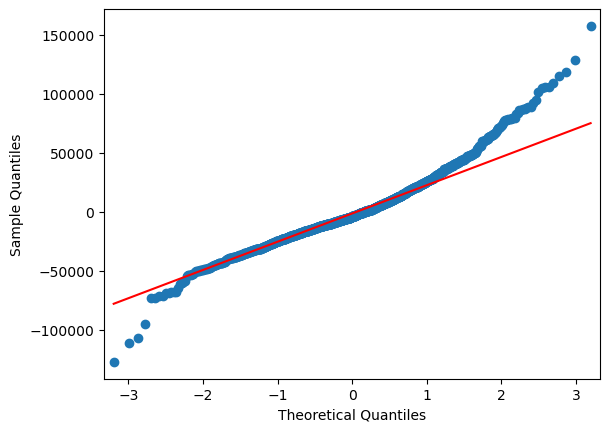

In [130]:
model=smf.ols('KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Weight',data=df1).fit()
qqplot=sm.qqplot(model.resid,line='q')

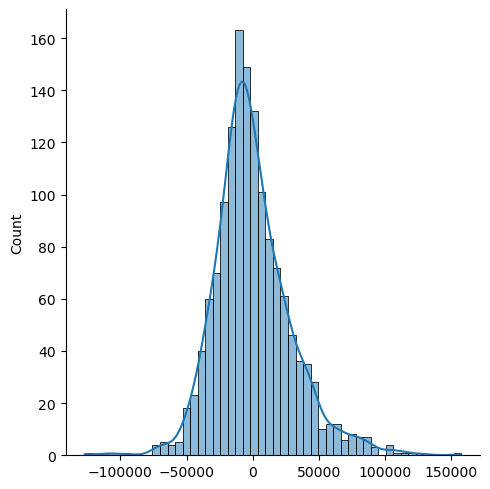

In [132]:
sns.displot(model.resid,kde=True)

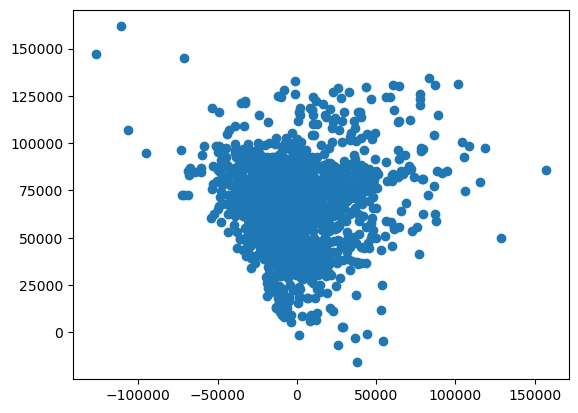

In [133]:
plt.scatter(model.resid,model.fittedvalues)

<Axes: >

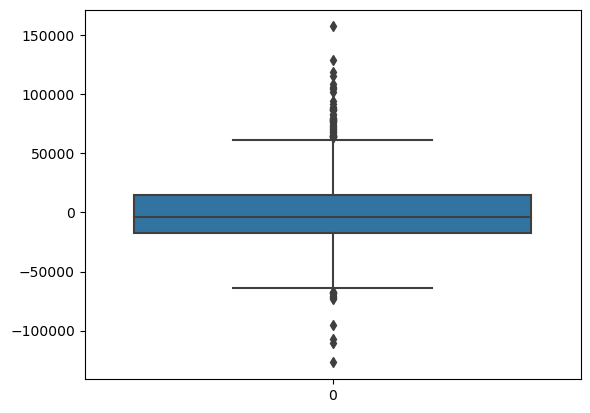

In [136]:
sns.boxplot(model.resid)

In [137]:
# standardization and normalization help to rescale the data because of with higher values the calicualtion will be difficut and there is occurance morecollinarity
#standardization and normalization can make easier caliculation and decrease multicollinarity

In [138]:
#we use vif to know the multicollinarity 
